In [1]:
import pandas as pd

In [2]:
skiAreaReviewDF = pd.read_csv('ProcessedReviews.csv')
skiAreaReviewDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18041 entries, 0 to 18040
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Review Text                       18041 non-null  object
 1   Review Star Rating (out of 5)     18041 non-null  int64 
 2   Clean Reviews                     18041 non-null  object
 3   Word Count                        18041 non-null  int64 
 4   Clean Reviews Stemmed             18041 non-null  object
 5   Clean Reviews Lemmed              18041 non-null  object
 6   Clean Reviews Lemmed and Stemmed  18041 non-null  object
dtypes: int64(2), object(5)
memory usage: 986.7+ KB


In [3]:
def binaryReview(rating):
    if rating > 3:
        return 1
    if rating < 3:
        return 0

In [4]:
skiAreaReviewDF['Binary Rating'] = skiAreaReviewDF['Review Star Rating (out of 5)'].apply(lambda rating: binaryReview(rating))

In [5]:
skiAreaReviewDF['Binary Rating'].head()

0    NaN
1    1.0
2    0.0
3    NaN
4    NaN
Name: Binary Rating, dtype: float64

In [6]:
skiAreaReviewDF = skiAreaReviewDF[skiAreaReviewDF['Binary Rating'].notnull()]

In [7]:
skiAreaReviewDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16118 entries, 1 to 18040
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Review Text                       16118 non-null  object 
 1   Review Star Rating (out of 5)     16118 non-null  int64  
 2   Clean Reviews                     16118 non-null  object 
 3   Word Count                        16118 non-null  int64  
 4   Clean Reviews Stemmed             16118 non-null  object 
 5   Clean Reviews Lemmed              16118 non-null  object 
 6   Clean Reviews Lemmed and Stemmed  16118 non-null  object 
 7   Binary Rating                     16118 non-null  float64
dtypes: float64(1), int64(2), object(5)
memory usage: 1.1+ MB


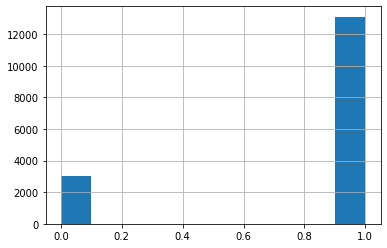

In [8]:
skiAreaReviewDF['Binary Rating'].hist()

In [9]:
skiAreaReviewDF['Word Count'].max()

2168

In [10]:
pd.crosstab(index= skiAreaReviewDF['Binary Rating'], columns="Total count")

col_0,Total count
Binary Rating,
0.0,3001
1.0,13117


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500) 
X = cv.fit_transform(skiAreaReviewDF['Clean Reviews Stemmed'].to_list())

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, skiAreaReviewDF['Binary Rating'], test_size=0.33, random_state=42, stratify=skiAreaReviewDF['Binary Rating'].to_list())

In [ ]:
X_train[1]

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=42).fit(X_train)
scores = cross_val_score(kmeans, X_train, y_train, scoring='accuracy', cv=5)
scores

In [ ]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(random_state=42, max_iter=1000)

In [ ]:
scores = cross_val_score(lg, X_train, y_train, scoring='accuracy', cv=5)
scores

In [ ]:
from sklearn import svm
vectorMachine = svm.SVC()

In [ ]:
scores = cross_val_score(vectorMachine, X_train, y_train, scoring='accuracy', cv=5)
scores

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000, criterion='entropy')

In [ ]:
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=5)
scores